In [2]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

titles=[]
for page in range(1,101):
    url = 'https://www.aitimes.com/news/articleList.html?page=%d&total=17245&box_idxno=&view_type=sm' %page
    html = urllib.request.urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    title_elements = soup.find_all('h4', class_='titles')
    for title_element in title_elements:
        title = title_element.text
        titles.append(title)

In [3]:
titles

['데이터킹, 메타버스 경진대회 출제위원사로 참여',
 '"라마를 무료로"...오픈소스에 \'상업적 사용\'까지 요구',
 "모바일서도 '챗GPT' 사용한다…오픈AI, 아이폰용 앱 출시",
 "[AI&빅테이터쇼] 오토스토어, 물류자동화 로봇 '큐브 스토리지' 소개",
 '뤼튼, AI 툴 빌더 전면 개방…”누구나 AI 툴 만들게 지원”',
 'AI 기술 가져다 새 키우기',
 '피니트, 미국주식 실시간 수급분석 서비스 ‘파워맵US’ 선보여',
 '상화, AI 및 로봇 기반 촬영·편집 자동화기술 선보여',
 '올거나이즈, LLMOps로 AI 변화 흐름탄다',
 "비브스튜디오스, '버추얼 프로덕션' 기술로 시선 강탈",
 "궁금한 뉴스 물어보면 찾아서 들려주는 AI '리오'",
 '오픈소스에 진심인 스태빌리티 AI...생성 AI용 오픈소스 플랫폼 출시',
 '범용인공지능(AGI)의 공포',
 '인트플로우, AI 활용한 가축 급이 행동분석 기술 특허 등록',
 '와이즈에이아이, 미추홀병원에 AI 고객센터 공급',
 "이제야 살금살금 걸음마 시작한 '옵티머스'",
 '엘리스-USG공유대학, AI 교육 및 디지털교과서 연구 MOU',
 'MS, 모바일 AI 챗봇 시장도 선점...스마트폰용 ‘빙챗’ 위젯 출시',
 '메디픽셀, IITPL과 구매 MOU 체결…인도 AI 헬스케어 시장 안착 목표',
 "[찬이의 IT교실] '챗GPT’ vs ‘바드’...검색 위한 AI 챗봇 비교",
 '',
 '인덴트, AI가 고객 리뷰 분석해주는 ‘AI 리뷰 인사이트’ 공개',
 '펄스나인-라라스테이션, 버추얼 휴먼 라이브커머스 사업 협약',
 'AI에게 아프리카 노동자를 그리라했더니…',
 "버드 버디, '새 키우기'는 AI 서비스로 인기",
 "스프링클라우드, 자율주행 비영리재단 'AWF' 회원사 등재",
 '챗GPT 무단 사용 차단하는 도구 등장',
 '이니텍, 한화생명 콜센터에 인증통합서비스 클라우드형으로 제공',
 '알리바바 클라우드, 넥스트챌린지재단과 한국 스타트업 육성 위한 MO

In [5]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [6]:
words = []
for sentence in titles:
    words.extend(sentence.split())
words

['데이터킹,',
 '메타버스',
 '경진대회',
 '출제위원사로',
 '참여',
 '"라마를',
 '무료로"...오픈소스에',
 "'상업적",
 "사용'까지",
 '요구',
 '모바일서도',
 "'챗GPT'",
 '사용한다…오픈AI,',
 '아이폰용',
 '앱',
 '출시',
 '[AI&빅테이터쇼]',
 '오토스토어,',
 '물류자동화',
 '로봇',
 "'큐브",
 "스토리지'",
 '소개',
 '뤼튼,',
 'AI',
 '툴',
 '빌더',
 '전면',
 '개방…”누구나',
 'AI',
 '툴',
 '만들게',
 '지원”',
 'AI',
 '기술',
 '가져다',
 '새',
 '키우기',
 '피니트,',
 '미국주식',
 '실시간',
 '수급분석',
 '서비스',
 '‘파워맵US’',
 '선보여',
 '상화,',
 'AI',
 '및',
 '로봇',
 '기반',
 '촬영·편집',
 '자동화기술',
 '선보여',
 '올거나이즈,',
 'LLMOps로',
 'AI',
 '변화',
 '흐름탄다',
 '비브스튜디오스,',
 "'버추얼",
 "프로덕션'",
 '기술로',
 '시선',
 '강탈',
 '궁금한',
 '뉴스',
 '물어보면',
 '찾아서',
 '들려주는',
 'AI',
 "'리오'",
 '오픈소스에',
 '진심인',
 '스태빌리티',
 'AI...생성',
 'AI용',
 '오픈소스',
 '플랫폼',
 '출시',
 '범용인공지능(AGI)의',
 '공포',
 '인트플로우,',
 'AI',
 '활용한',
 '가축',
 '급이',
 '행동분석',
 '기술',
 '특허',
 '등록',
 '와이즈에이아이,',
 '미추홀병원에',
 'AI',
 '고객센터',
 '공급',
 '이제야',
 '살금살금',
 '걸음마',
 '시작한',
 "'옵티머스'",
 '엘리스-USG공유대학,',
 'AI',
 '교육',
 '및',
 '디지털교과서',
 '연구',
 'MOU',
 'MS,',
 '모바일',
 'AI',
 '챗봇',
 '시장도',
 '선점...스마트폰용',
 '‘빙챗’',

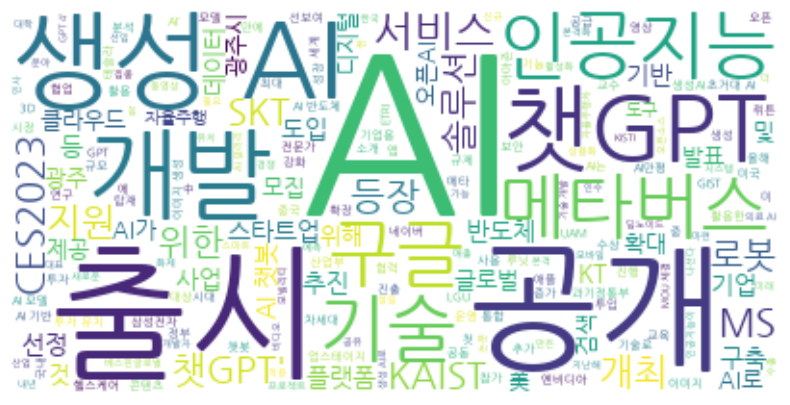

In [7]:

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 문장에서 단어 추출
words = []
for sentence in titles:
    words.extend(sentence.split())

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='NanumGothic.ttf', background_color='white').generate(' '.join(words))

# 워드 클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
